In [224]:
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

In [185]:
df = sns.load_dataset('iris')
tipos = df.iloc[:,-1].unique().tolist()
#Setosa e Versicolor
df1 = df[df.iloc[:, -1].isin([tipos[0], tipos[1]])]
#Versicolor e Virginica
df2 = df[df.iloc[:, -1].isin([tipos[1], tipos[2]])]

In [186]:
df1.loc[:,'species'] = df1['species'].replace({'setosa': 0, 'versicolor': 1})
df1 = df1.sample(frac=1).reset_index(drop=True)
df1_normalized = pd.DataFrame(MinMaxScaler().fit_transform(df1), columns=df1.columns)

In [187]:
df2.loc[:,'species'] = df2['species'].replace({'virginica': 0, 'versicolor': 1})
df2 = df2.sample(frac=1).reset_index(drop=True)
df2_normalized = pd.DataFrame(MinMaxScaler().fit_transform(df2), columns=df2.columns)

<b>Função degrau: </b><br>
$
\
f(x)=
    \begin{cases}
       \text{1,} &\quad\text{if x}\ge0\\
       \text{0,} &\quad\text{otherwise}\\
    \end{cases}
\
$

In [188]:
def degrau(x):
    if x >= 0:
        return 1
    return 0

def reg(df,w,b):
    lista_predicto = []
    lista_real = []
    linhas, colunas  = df.shape
    for linha in range(linhas):
        total = 0
        for coluna in range(colunas-1):
            x = df.iloc[linha,coluna]
            total += x * w[coluna]
    
        
        y_predicto = degrau(total + b)
    

        lista_predicto.append(y_predicto)
    lista_real = df.iloc[:,colunas-1].tolist()
    return lista_predicto, lista_real

Para atualizar o peso e o bias da função degrau (classificação) estamos considerando a média dos erros <br><br>

$\omega_{k}^{t} = \omega_{k}^{t-1} - \eta^{t} \cdot\frac{1}{N} \sum_{i=1}^N (\hat{y}_i-y_i)$ <br><br>

$b_{k}^{t} = b_{k}^{t-1} - \eta^{t} \cdot\frac{1}{N} \sum_{i=1}^N (\hat{y}_i-y_i)$ <br><br>



In [195]:
def atualizacao_peso(lista_predicto,lista_real,df,w,n,b,interacao):
    
    w_novo = []

    #n = n_interacao(interacao,n)

    linhas, colunas  = df.shape
    
    y_diferenca = [i1 - i2 for i1, i2 in zip(lista_predicto,lista_real)]

    for coluna in range(colunas-1):
        w_total = 0

        for linha in range(linhas):
            w_total += round(y_diferenca[linha] * df.iloc[linha,coluna],4)
            #print(f'w_tot {w_total} l{linha} c{coluna} e{y_diferenca[linha]}')
           
            
        w_total = w[coluna] - n * (1/linhas) * w_total
        w_novo.append(w_total)



    b_total = sum(y_diferenca)
    
    b_novo = b - n * (1/linhas) * b_total
    
    return w_novo,b_novo

In [190]:
w = [round(random.gauss(0, 0.5),4) for _ in range(df.shape[1] - 1)]
b = random.gauss(0, 0.5)
n = 0.5

In [210]:
iteracao = 100
for i in tqdm(range(1,iteracao)):
    if (iteracao%11==0):
        n = n*0.9
    lista_predicto1, lista_real1 = reg(df1_normalized,w,b)
    w, b = atualizacao_peso(lista_predicto1,lista_real1,df1_normalized,w,n,b,i)

100%|███████████████████████████████████████████| 99/99 [00:02<00:00, 42.43it/s]


100%|██████████| 99/99 [00:01<00:00, 93.46it/s] 


In [157]:
df2

,sepal_length,sepal_width,petal_length,petal_width,species
0,7.3,2.9,6.3,1.8,0.0
1,5.2,2.7,3.9,1.4,1.0
2,6.9,3.1,4.9,1.5,1.0
3,5.6,3.0,4.5,1.5,1.0
4,5.9,3.0,5.1,1.8,0.0
...,...,...,...,...,...
96,5.1,2.5,3.0,1.1,1.0
97,7.0,3.2,4.7,1.4,1.0
98,5.0,2.3,3.3,1.0,1.0
99,6.3,2.5,5.0,1.9,0.0


In [218]:
iteracao = 100
for i in tqdm(range(1,iteracao)):
    lista_predicto2, lista_real2 = reg(df2_normalized,w,b)
    w, b = atualizacao_peso(lista_predicto2,lista_real2,df2_normalized,w,n,b,i)

100%|███████████████████████████████████████████| 99/99 [00:02<00:00, 43.59it/s]


100%|██████████| 99/99 [00:01<00:00, 96.59it/s] 


In [220]:
a = 0
for i in range(len(lista_predicto1)):
    if lista_predicto1[i] == lista_real1[i]:
        a += 1
print(f'taxa de acertos: {a/len(lista_real1)*100}%')

taxa de acertos: 100.0%


In [219]:
a = 0
for i in range(len(lista_predicto2)):
    if lista_predicto2[i] == lista_real2[i]:
        a += 1
print(f'taxa de acertos: {a/len(lista_real2)*100}%')

taxa de acertos: 95.0%


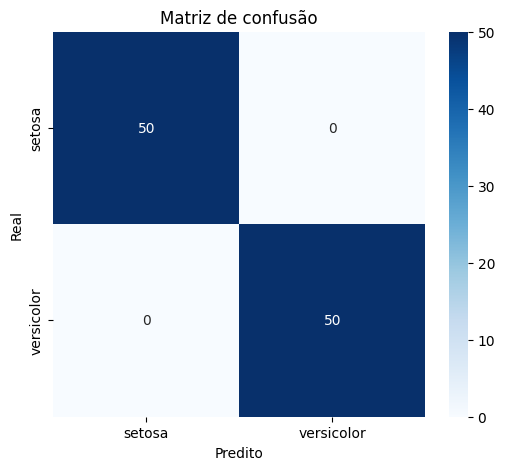

In [225]:
cm = confusion_matrix(lista_predicto1, lista_real1)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["setosa", "versicolor"], yticklabels=["setosa", "versicolor"])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de confusão")
plt.show()

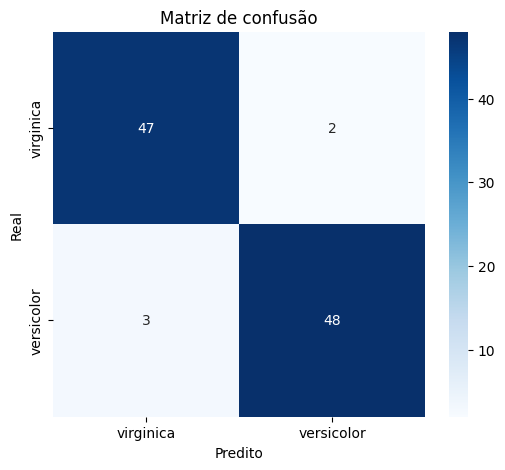

In [226]:
cm = confusion_matrix(lista_predicto2, lista_real2)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["virginica", "versicolor"], yticklabels=["virginica", "versicolor"])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de confusão")
plt.show()